# Analýza hlavních komponent (PCA)

...a jiné metody průzkumu dat a redukce počtu dimenzí

## Co se naučíte

Analýza hlavních komponent (anglicky “principal component analysis” neboli PCA) je metoda na snížení počtu dimenzí mnohorozměrných dat. To se může hodit z hlediska vizualizace nebo kvůli úspoře času/paměti při strojovém učení.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline
sns.set_style('whitegrid')

## Jak porovnat babičce víno ve spíži?

Data níže obsahují [13 různých charakteristik 178 italských vín](https://archive.ics.uci.edu/ml/datasets/wine). Představte si, že chcete tato vína vykreslit jako body do jednoho grafu. Případně si představte, že vás babička poprosila, abyste je vyrovnali do polic tak, aby "podobná" vína byla u sebe a "různá" vína co nejdál od sebe. Jak něco takového uděláte?

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
print(wine_df.shape)
wine_df.head()

(178, 13)


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

Jedna možnost je vybrat si dvojici dvou vlastností, která je zásadní pro vaše data. Ale co když se ve víně nevyznáte? Můžete pochopitelně vykreslit grafy všech možných dvojic. 

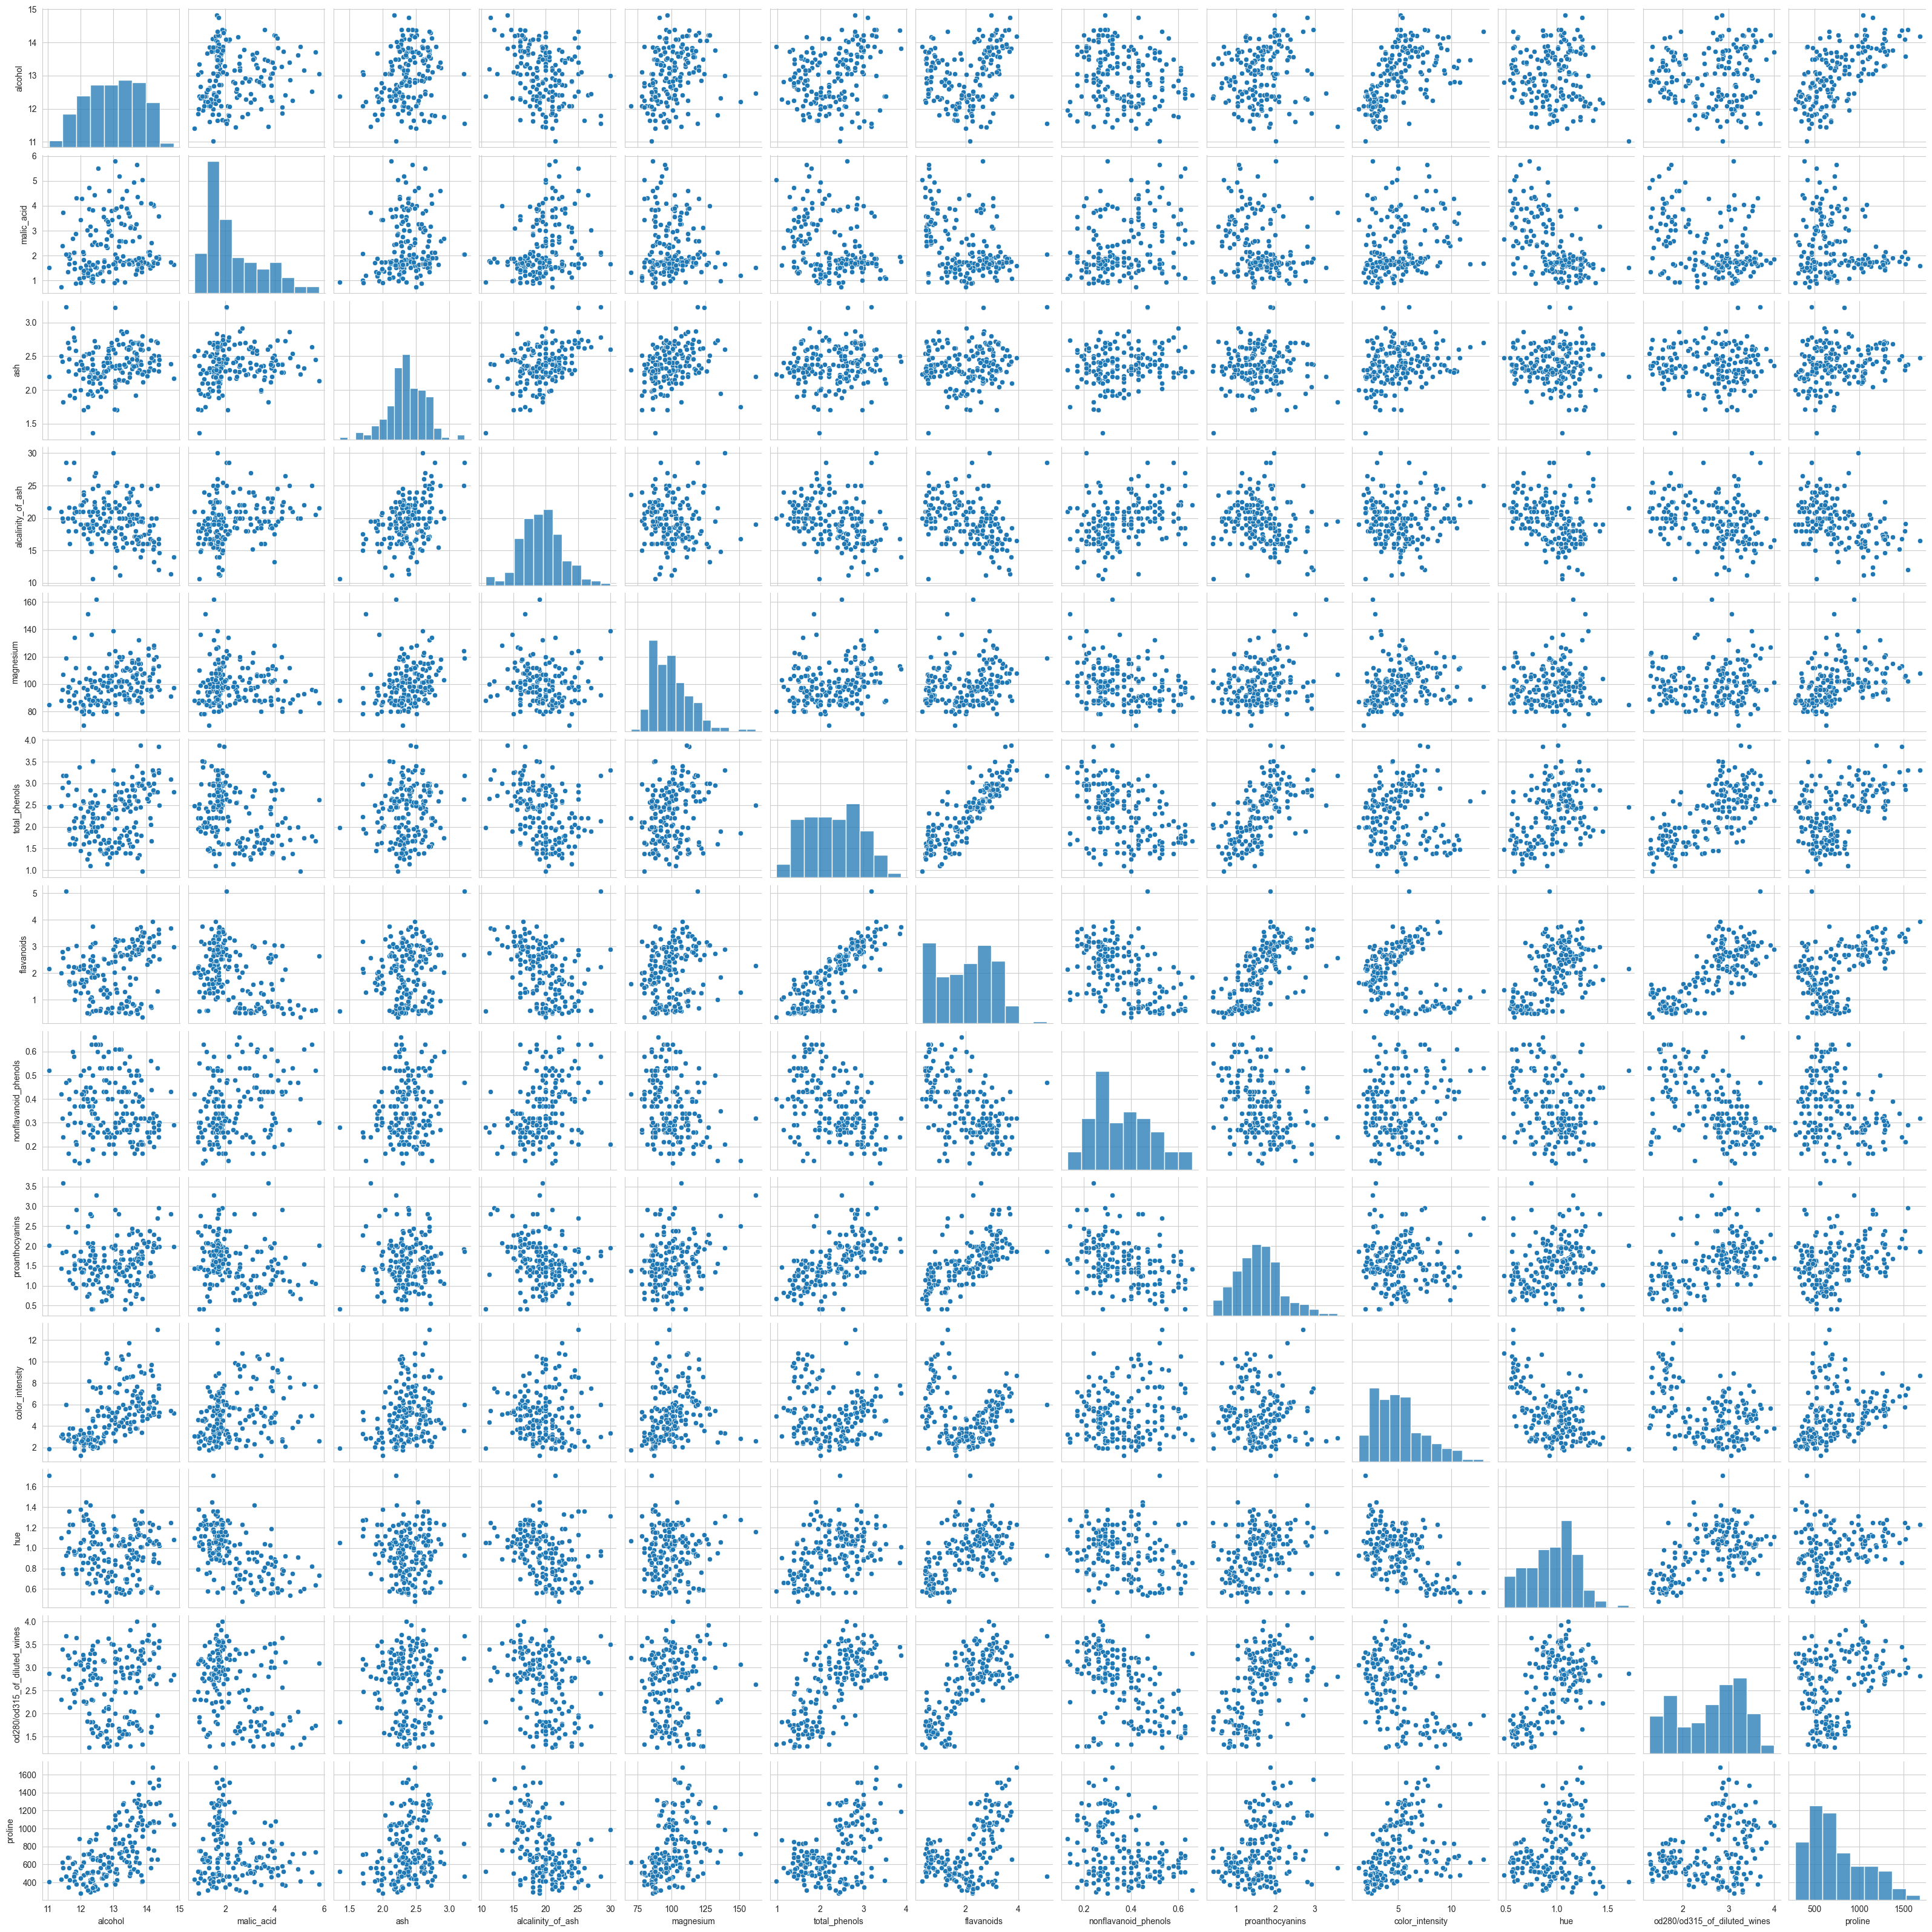

In [3]:
sns.pairplot(wine_df);

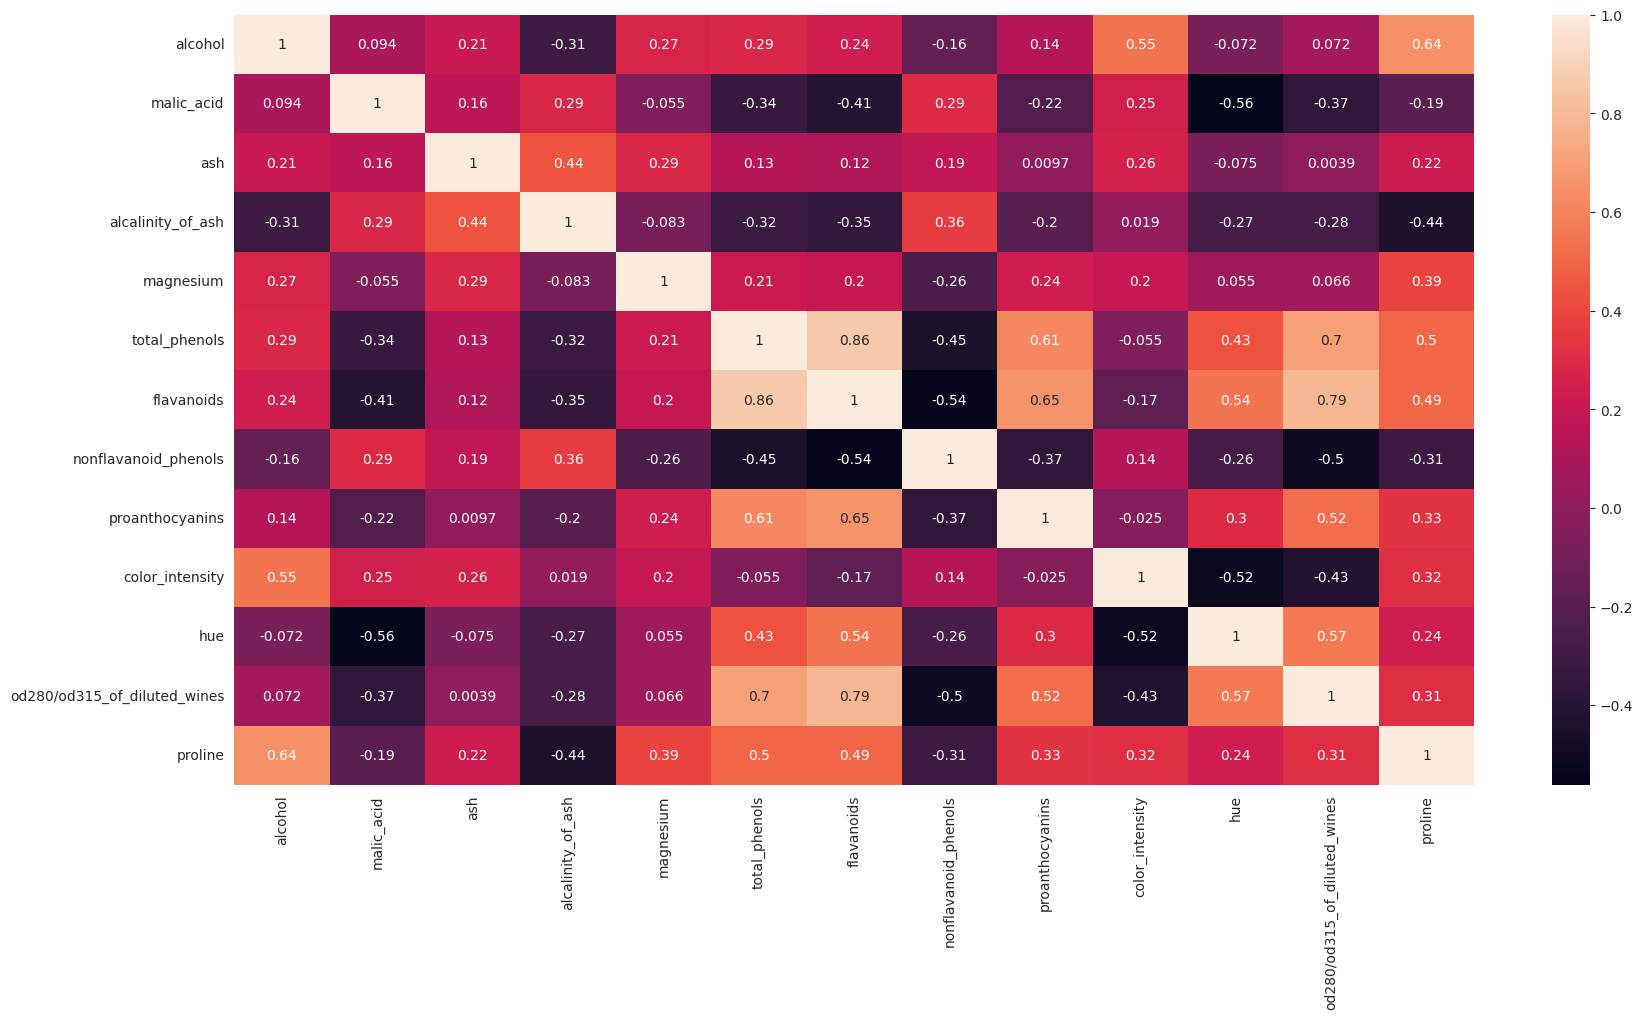

In [4]:
plt.figure(figsize=(20,10)) 
sns.heatmap(wine_df.corr(), annot=True); 

Jak vidíme, mnoho charakteristik je korelovaných (např. `total_phenols` a `flavanoids`).  PCA umožňuje převést mnoho charakteristik (sloupců) na několik málo, které a) jsou nezávislé b) zachycují maximum informace (variability) v datech.

Protože obrazovky a stěny ve spíži obvykle bývají dvourozměrné, budeme dále (nebude-li řečeno jinak) zjednodušovat z X charakteristik na dvě, abychom tyto potom mohli zakreslit do grafu na osu $x$ a $y$. Podívejme se, jak to dopadne pro náši datovou sadu vín.

### PCA graf

In [4]:
# Tento blok znormalizuje sloupečky v tabulce, aby měly průměr nula a rozptyl jedna
# Pokud to neuděláte, bude hrát roli v jakých jednotkách slooupec je
scaler = StandardScaler()
wine_df_scaled = scaler.fit_transform(wine_df)

In [5]:
wine_df_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]], shape=(178, 13))

In [6]:
# Tento blok spočte PCA souřadnice (volíme zjednodušení na dvě komponenty)
pca = PCA(n_components=2)
wine_pca = pd.DataFrame(pca.fit_transform(wine_df_scaled), columns=['PCA1', 'PCA2'])
wine_pca

PCA1      PCA2
0    3.316751  1.443463
1    2.209465 -0.333393
2    2.516740  1.031151
3    3.757066  2.756372
4    1.008908  0.869831
..        ...       ...
173 -3.370524  2.216289
174 -2.601956  1.757229
175 -2.677839  2.760899
176 -2.387017  2.297347
177 -3.208758  2.768920

[178 rows x 2 columns]

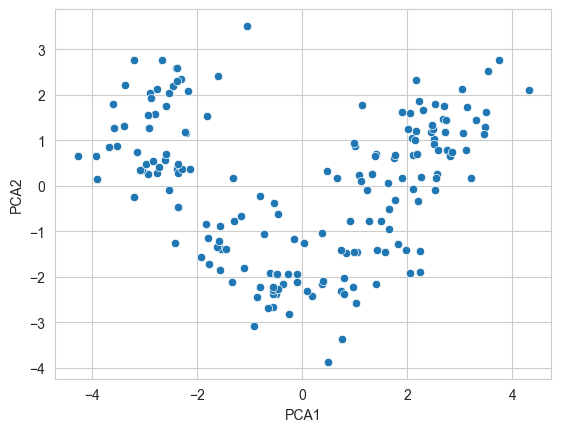

In [7]:
# A tento je zakreslí do grafu
sns.scatterplot(x=wine_pca.PCA1, y=wine_pca.PCA2);

Splnili jsme úkol, bude babička spokojená? Jsou podobná vína zakreslená poblíž sebe? 

K vínům lze v naší databázi dohledat ještě jednu informaci - vína patří do jedné ze tří kategorií (barva vína?). A skutečně, pokud si body na PCA grafu obarvíme podle kategorie vína, jasně vidíme tři shluky.

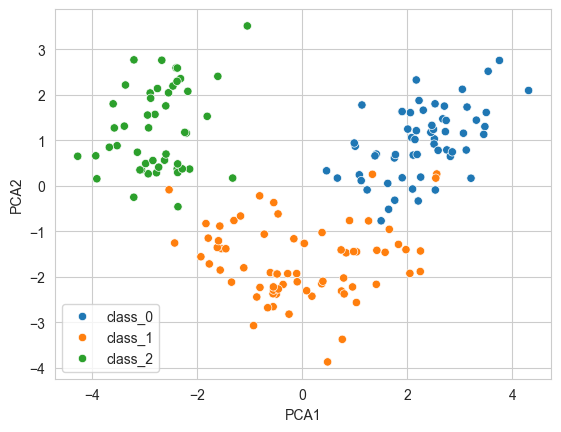

In [8]:
sns.scatterplot(x=wine_pca.PCA1, y=wine_pca.PCA2, hue=wine.target_names[wine.target]);

### Podíl zachycené variability

PCA umožňuje též kvantifikovat, kolik procent variability je v prvních dvou PCA komponentách zachyceno.

In [9]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

## Cvičení 1: Tučňáci

Pro první cvičení použijeme data o tučňácích od Allison Horst, https://github.com/allisonhorst/penguins.

Podobně jako slavná data o kosatcích od R. A. Fishera se tučňáčí data snaží být jednoduchým učebnicovým příkladem na zvládnutí základních technik manipulace s daty a visualizace.

In [11]:
penguins = pd.read_csv('penguins_size_nona.csv')

print(penguins.shape)
penguins.head()

(333, 7)


species     island     sex  culmen_length_mm  culmen_depth_mm  \
0  Adelie  Torgersen    MALE              39.1             18.7   
1  Adelie  Torgersen  FEMALE              39.5             17.4   
2  Adelie  Torgersen  FEMALE              40.3             18.0   
3  Adelie  Torgersen  FEMALE              36.7             19.3   
4  Adelie  Torgersen    MALE              39.3             20.6   

   flipper_length_mm  body_mass_g  
0                181         3750  
1                186         3800  
2                195         3250  
3                193         3450  
4                190         3650

In [12]:
scaler = StandardScaler()
penguins_df_scaled = pd.DataFrame(scaler.fit_transform(penguins[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]),
                                  columns=penguins.columns[3:]) 

penguins_df_scaled.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0         -0.896042         0.780732          -1.426752    -0.568475
1         -0.822788         0.119584          -1.069474    -0.506286
2         -0.676280         0.424729          -0.426373    -1.190361
3         -1.335566         1.085877          -0.569284    -0.941606
4         -0.859415         1.747026          -0.783651    -0.692852

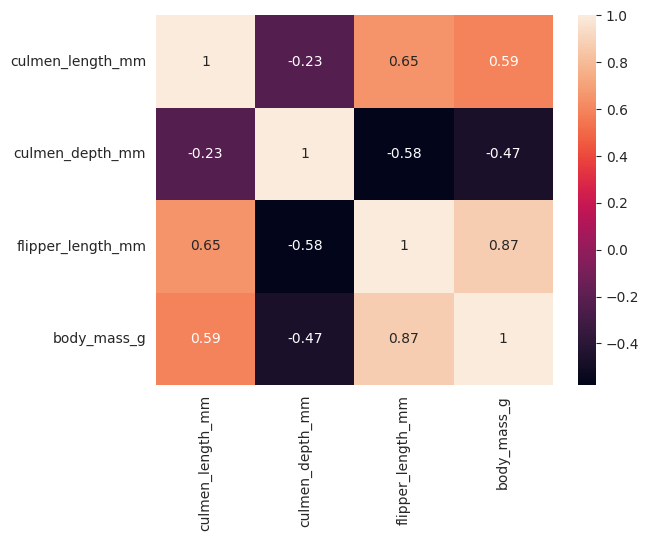

In [13]:
sns.heatmap(penguins_df_scaled.corr(), annot=True); 

![tucnaci](https://i.imgur.com/orZWHly.png)

Zredukujte tyto čtyři charakteristiky na dvě PCA, spočtěte množství vysvětlené variability a vykreslete vše do scatterplotu, který obarvíte podle druhu tučňáka. Je na PCA grafu vidět rozdíl mezi druhy tučňáků? Je vidět rozdíl mezi samcemi a samicemi?

In [13]:
# sem napište řešení
penguins_df_scaled

pca = PCA(n_components=2)
penguins_pca = pd.DataFrame(pca.fit_transform(penguins_df_scaled), columns=['PCA1', 'PCA2'])
penguins_pca

PCA1      PCA2
0   -1.853593  0.032069
1   -1.316254 -0.443527
2   -1.376605 -0.161230
3   -1.885288 -0.012351
4   -1.919981  0.817598
..        ...       ...
328  1.997716 -0.976771
329  1.832651 -0.784510
330  2.751505  0.266556
331  1.713854 -0.725875
332  2.018537  0.336554

[333 rows x 2 columns]

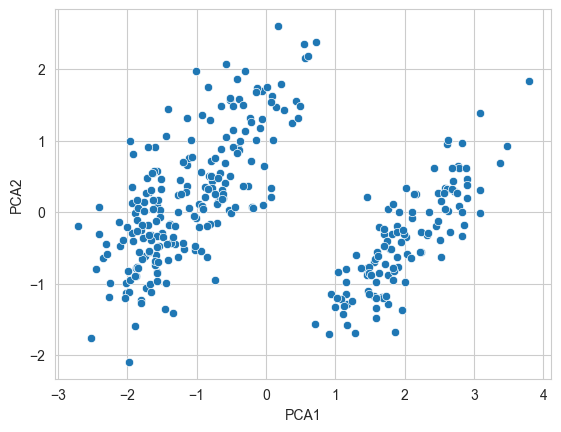

In [18]:
sns.scatterplot(x=penguins_pca.PCA1, y=penguins_pca.PCA2);

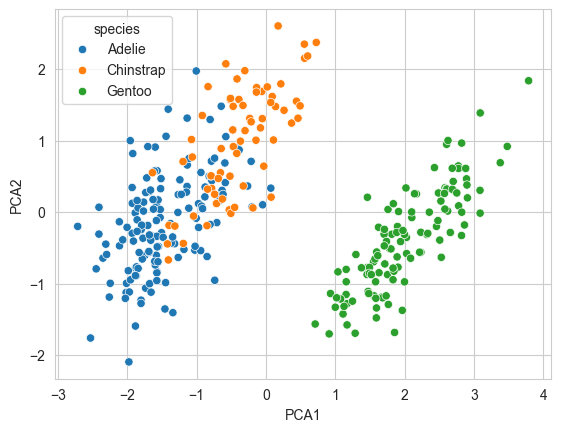

In [17]:
sns.scatterplot(x=penguins_pca.PCA1, y=penguins_pca.PCA2, hue=penguins.species);

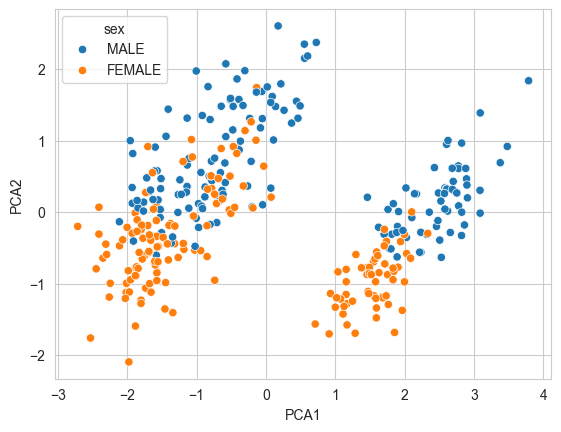

In [20]:
sns.scatterplot(x=penguins_pca.PCA1, y=penguins_pca.PCA2, hue=penguins.sex);

In [14]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

## Breast Cancer Wisconsin Dataset

Data z klinických měření ohledně rakoviny prsu z Wisconsinské univerzity. Celkem máme 569 pacientů a u každého z nich 31 veličin ohodnocujících [FNA snímek prsní tkáně](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) a informaci, zda-li byl nádor zhoubný (maligní) či nezhoubný (benigní).

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

col_names = list(cancer.feature_names)
col_names.append('target')
cancer_df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=col_names)
print(cancer_df.shape)
print(cancer.target_names)
cancer_df.head()

(569, 31)
['malignant' 'benign']


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

Začněme stejně jako v minulém případě pohledem párovými grafy, které si tentokrát obarvíme dle typu nádoru.

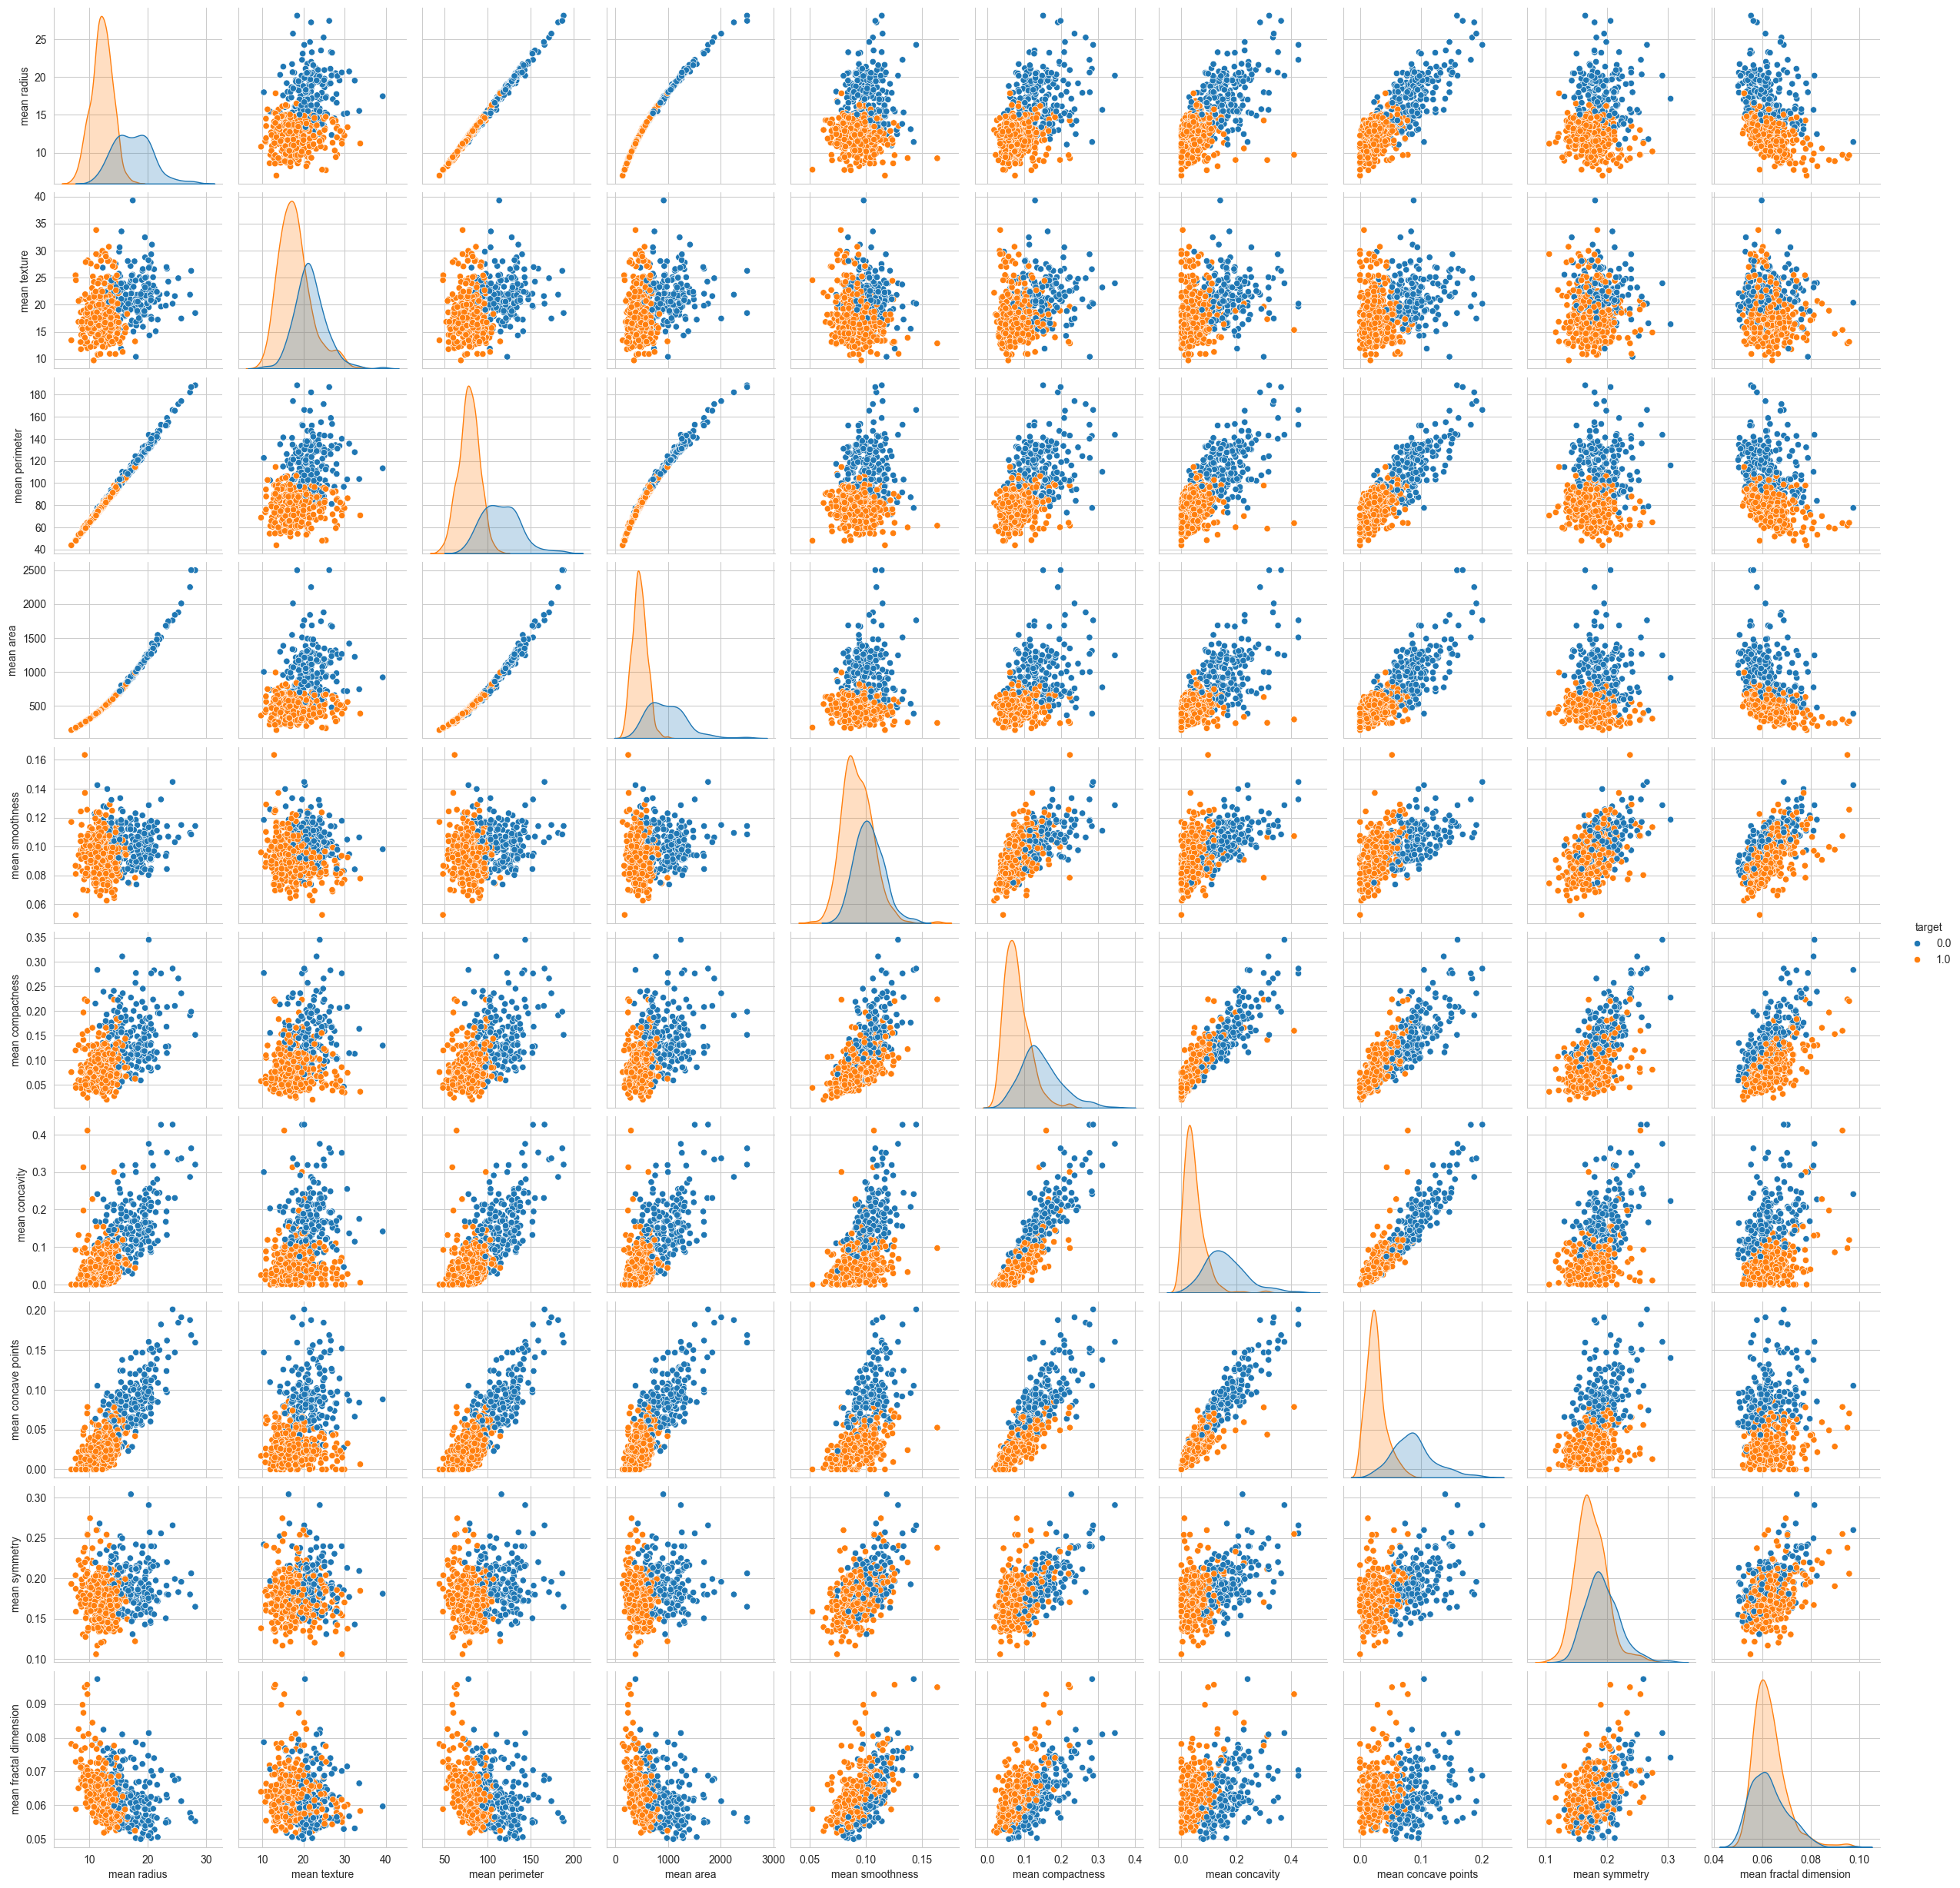

In [23]:
sns.pairplot(cancer_df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 
                                     'mean smoothness', 'mean compactness', 'mean concavity',
                                     'mean concave points', 'mean symmetry', 'mean fractal dimension']);

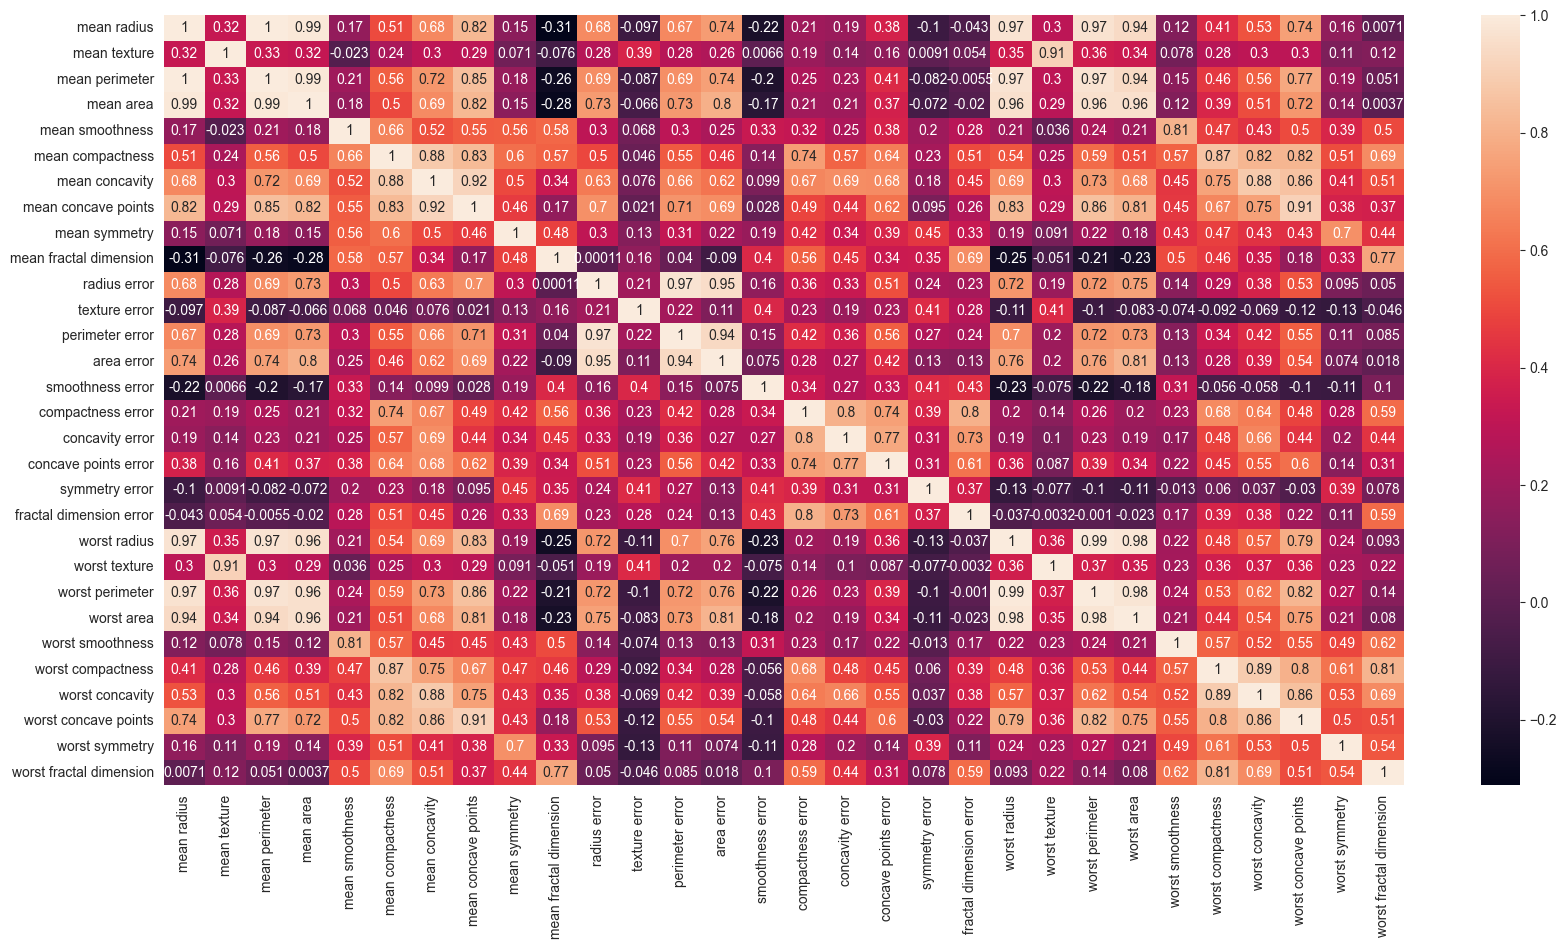

In [24]:
plt.figure(figsize=(20,10)) 
sns.heatmap(cancer_df.drop(columns="target").corr(), annot=True); 

Na první pohled vidíme, že některé charakteristiky nesou více informace než jiné.

<Axes: xlabel='mean area', ylabel='mean smoothness'>

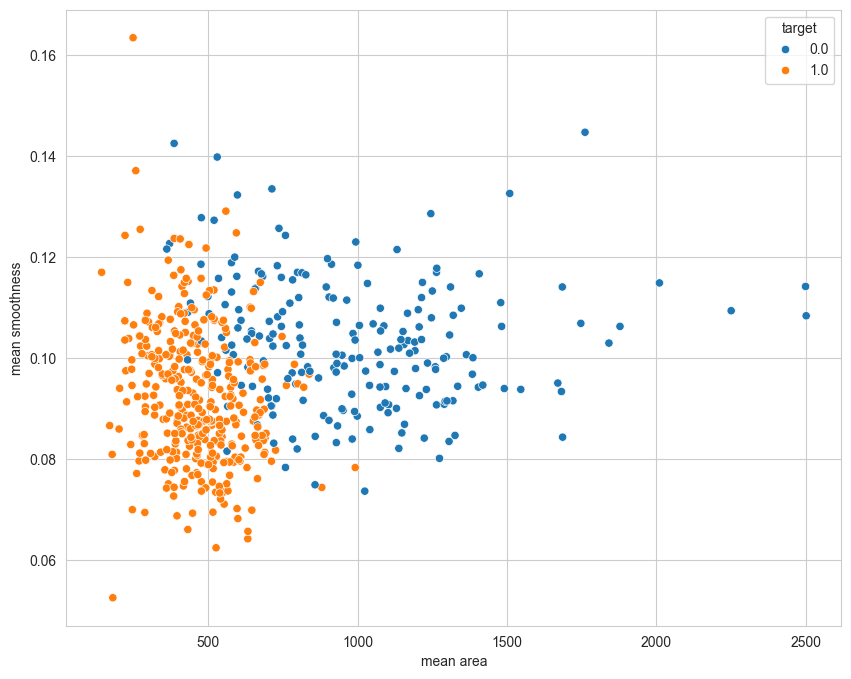

In [25]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = cancer_df)

Spočítejme tedy nyní PCA komponenty, jejich podíl na variabilitě a nakresleme PCA graf.

In [30]:
scaler = StandardScaler()
scaler.fit(cancer_df.drop('target', axis=1))
scaled_data = scaler.transform(cancer_df.drop('target', axis=1))

pd.DataFrame(scaled_data).head()

0         1         2         3         4         5         6   \
0  1.097064 -2.073335  1.269934  0.984375  1.568466  3.283515  2.652874   
1  1.829821 -0.353632  1.685955  1.908708 -0.826962 -0.487072 -0.023846   
2  1.579888  0.456187  1.566503  1.558884  0.942210  1.052926  1.363478   
3 -0.768909  0.253732 -0.592687 -0.764464  3.283553  3.402909  1.915897   
4  1.750297 -1.151816  1.776573  1.826229  0.280372  0.539340  1.371011   

         7         8         9   ...        20        21        22        23  \
0  2.532475  2.217515  2.255747  ...  1.886690 -1.359293  2.303601  2.001237   
1  0.548144  0.001392 -0.868652  ...  1.805927 -0.369203  1.535126  1.890489   
2  2.037231  0.939685 -0.398008  ...  1.511870 -0.023974  1.347475  1.456285   
3  1.451707  2.867383  4.910919  ... -0.281464  0.133984 -0.249939 -0.550021   
4  1.428493 -0.009560 -0.562450  ...  1.298575 -1.466770  1.338539  1.220724   

         24        25        26        27        28        29  
0  1.307686  2.616665  2.109526  2.296076  2.750622  1.937015  
1 -0.375612 -0.430444 -0.146749  1.087084 -0.243890  0.281190  
2  0.527407  1.082932  0.854974  1.955000  1.152255  0.201391  
3  3.394275  3.893397  1.989588  2.175786  6.046041  4.935010  
4  0.220556 -0.313395  0.613179  0.729259 -0.868353 -0.397100  

[5 rows x 30 columns]

In [31]:
pca = PCA(n_components=2)
cancer_pca = pd.DataFrame(pca.fit_transform(scaled_data), columns=['PCA1', 'PCA2'])
cancer_pca

PCA1       PCA2
0     9.192837   1.948583
1     2.387802  -3.768172
2     5.733896  -1.075174
3     7.122953  10.275589
4     3.935302  -1.948072
..         ...        ...
564   6.439315  -3.576817
565   3.793382  -3.584048
566   1.256179  -1.902297
567  10.374794   1.672010
568  -5.475243  -0.670637

[569 rows x 2 columns]

In [32]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

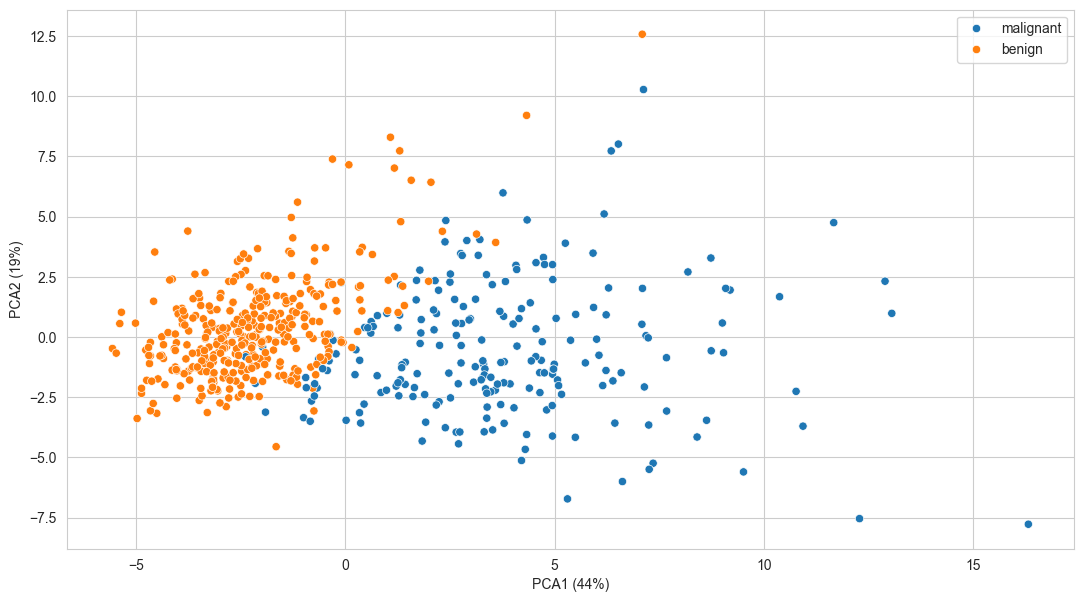

In [33]:
plt.figure(figsize=(13,7))
sns.scatterplot(x=cancer_pca.PCA1, y=cancer_pca.PCA2, 
                hue=cancer.target_names[cancer.target],
                
               )
plt.xlabel('PCA1 (44%)')
plt.ylabel('PCA2 (19%)');

Na PCA grafu je vidět několik oranžových (benigních) teček uprostřed modré (maligní) oblasti. Možná by bylo dobré podívat se na tyto pacienty podrobněji. Ale na jak zjistíme, kolikátému řádku bod odpovídá? Potřebujeme interaktivní graf!

### Interaktivní PCA graf

In [34]:
import plotly
import plotly.express as px

In [35]:
# V našich datech není Patient ID, tak si nějaké vytvoříme
cancer_df['patient'] = ['Patient' + str(i) for i in range(cancer_df.shape[0])]
cancer_df['patient']

0        Patient0
1        Patient1
2        Patient2
3        Patient3
4        Patient4
          ...    
564    Patient564
565    Patient565
566    Patient566
567    Patient567
568    Patient568
Name: patient, Length: 569, dtype: object

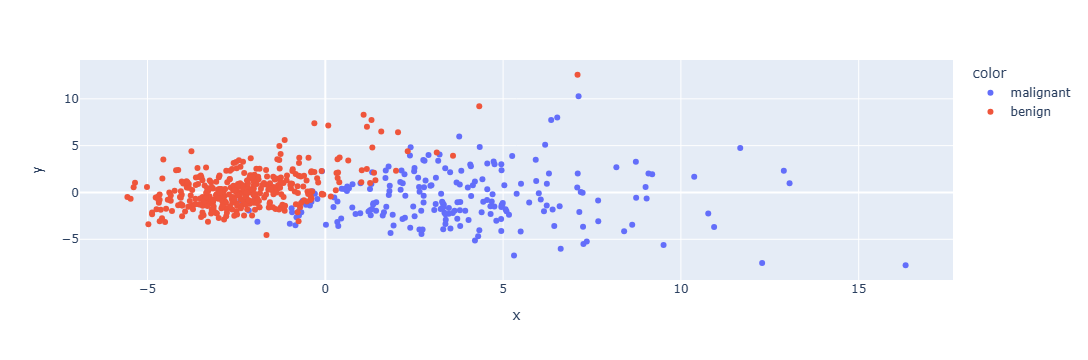

In [39]:
# naucse.python.cz neumí zobrazit interaktivní graf, proto je níže zakomentovaný
fig = px.scatter(x=cancer_pca.PCA1, y=cancer_pca.PCA2, color=cancer.target_names[cancer.target],
                 hover_name = cancer_df['patient'])
fig.show()  # zrušte komentář pro nakreslení obrázku

### Interpretace koeficientů

Aniž bychom příliš zabíhali do matematické podstaty PCA, každá naše uměle vytvořená komponenta je ve skutečnosti lineární kombinací jendotlivých charakteristik (po normalizaci), tedy např.

$$\texttt{PCA}_1 =  \beta_0 + \beta_1 * \texttt{Vlastnost(1)} + \beta_2 * \texttt{Vlastnost(2)} + \cdots + \beta_k * \texttt{Vlastnost(k)}$$

Pokud jsme sloupce normalizovali pomocí `StandardScaler`, můžeme velikost koeficientů (v absolutní hodnotě) do jisté míry interpretovat jako jak moc se daná vlastnost na PCA komponentě podílí. Buďte však v této interpretaci opatrní (je snadné vidět v datech něco, co tam ve skutečnosti není).

In [40]:
loadings = pd.DataFrame(pca.components_.T, index=cancer_df.columns[:-2], columns=cancer_pca.columns) 
loadings.sort_values('PCA1', ascending=False).head(n=10)

PCA1      PCA2
mean concave points   0.260854 -0.034768
mean concavity        0.258400  0.060165
worst concave points  0.250886 -0.008257
mean compactness      0.239285  0.151892
worst perimeter       0.236640 -0.199878
worst concavity       0.228768  0.097964
worst radius          0.227997 -0.219866
mean perimeter        0.227537 -0.215181
worst area            0.224871 -0.219352
mean area             0.220995 -0.231077

U části kódu v této části jsme se inspirovali v https://www.kaggle.com/faressayah/support-vector-machine-pca-tutorial. Kaggle je nejen soutěžní server, ale též velmi dobrý zdroj inspirace a návodů. Můžete se zde zkusit podívat na jiné techniky, které znáte z tohoto kurzu.

## Cvičení 2: Vliv stárnutí na expresi proteinů v ledvinách

Pro druhé cvičení využijeme měření exprese proteinů z myších ledvin. Celkem máme 188 myší, které se liší pohlavím (samci, samice), zařazením do skupiny (generace, G8-G12) a věkem (6, 12 či 18 měsíců). Více informací o experimentu naleznete na [https://ytakemon.github.io/TheAgingKidney/analysis.html](https://ytakemon.github.io/TheAgingKidney/analysis.html). Názvy proteinů byly anonymizovány.

Na základě proteinové exprese nakreslete PCA graf a rozhodněte, jestli první dvě komponenty odpovídají nějaké informaci, kterou v záznamech máte (pohlaví, skupina, věk). Pokud vám zbyde čas, pokuste se nakreslit interaktivní graf.

In [41]:
url_protein_expr = 'http://github.com/simecek/naucse.python.cz/blob/master/lessons/pydata/pca/static/protein_expr.zip?raw=true'
protein_expr = pd.read_csv(url_protein_expr, compression="zip")
print(protein_expr.shape)
protein_expr.head()

(188, 4548)


Mouse_ID Sex Generation    Age  Protein_1  Protein_2  Protein_3  Protein_4  \
0  DO-0661   F         G8  12mos  -0.272366   0.164789  -0.720521  -0.098587   
1  DO-0669   F         G8  18mos   1.860412   0.637867  -0.654035   0.720521   
2  DO-0670   F         G8  12mos  -0.191457   1.006581  -0.864279   0.045949   
3  DO-0673   F         G8  18mos  -1.284541  -1.122194   0.178107   1.490375   
4  DO-0674   F         G8  12mos  -0.498969  -0.590323  -0.621864   2.151794   

   Protein_5  Protein_6  ...  Protein_6696  Protein_6697  Protein_6698  \
0   0.606018   0.383201  ...     -1.790968      0.245224     -0.272366   
1  -0.621864   0.327281  ...      0.383201     -1.531465      0.864279   
2   0.903064  -0.341158  ...     -0.425932     -0.045949     -1.097893   
3  -0.772547   1.575317  ...      0.963935      0.513889      0.670377   
4   0.111784  -0.085408  ...      0.590323      0.590323     -1.122194   

   Protein_6699  Protein_6700  Protein_6702  Protein_6705  Protein_6706  \
0     -0.245224     -0.245224      2.034663      1.255151     -0.178107   
1      0.574773      1.006581      2.559868      0.574773      0.883505   
2     -1.531465      0.341158     -0.245224      0.313466      1.097893   
3      0.703610     -0.111784     -0.808421      0.178107      0.245224   
4     -1.315084     -0.484160      0.138238      0.383201      1.531465   

   Protein_6715  Protein_6716  
0     -1.097893      1.284541  
1      0.218262      0.286012  
2      1.346906      1.006581  
3      0.574773      0.299711  
4      0.397363     -0.590323  

[5 rows x 4548 columns]

In [45]:
# sem napište řešení
scaler = StandardScaler()
protein_mouse_scaled = scaler.fit_transform(protein_expr.drop(columns=['Mouse_ID', 'Sex', 'Generation', 'Age']))
protein_mouse_scaled

array([[-0.27695132,  0.16377746, -0.74906215, ..., -0.18748313,
        -1.12187954,  1.30633136],
       [ 1.8985194 ,  0.64703752, -0.68094478, ...,  0.89847505,
         0.22259761,  0.28578128],
       [-0.1944224 ,  1.02368742, -0.89634813, ...,  1.11777908,
         1.37552942,  1.02224185],
       ...,
       [-0.03260497, -0.17289439,  0.61003183, ..., -0.81377332,
        -1.44581215, -0.51651149],
       [-0.55410236, -0.43965833,  0.10366845, ..., -0.26999727,
         1.09697892,  0.67862271],
       [ 0.23722749, -0.09180454,  0.85525478, ..., -1.23221259,
        -0.80772572,  1.00021965]], shape=(188, 4544))

In [55]:
protein_mouse1 = protein_expr.iloc[:, 4:]
protein_mouse1 

Protein_1  Protein_2  Protein_3  Protein_4  Protein_5  Protein_6  \
0    -0.272366   0.164789  -0.720521  -0.098587   0.606018   0.383201   
1     1.860412   0.637867  -0.654035   0.720521  -0.621864   0.327281   
2    -0.191457   1.006581  -0.864279   0.045949   0.903064  -0.341158   
3    -1.284541  -1.122194   0.178107   1.490375  -0.772547   1.575317   
4    -0.498969  -0.590323  -0.621864   2.151794   0.111784  -0.085408   
..         ...        ...        ...        ...        ...        ...   
183   0.826753   1.051141  -0.272366  -1.028606   0.313466  -0.963935   
184  -1.122194   1.940195   0.164789  -1.451658   0.544079  -0.903064   
185  -0.032815  -0.164789   0.606018  -1.490375   0.098587   1.346906   
186  -0.544079  -0.425932   0.111784  -0.045949  -1.051141   0.808421   
187   0.231722  -0.085408   0.845367  -1.575317   0.670377  -0.637867   

     Protein_7  Protein_8  Protein_9  Protein_10  ...  Protein_6696  \
0    -0.637867  -0.313466   0.922974   -1.172896  ...     -1.790968   
1     0.411606   0.191457   0.621864    1.940195  ...      0.383201   
2    -2.034663  -2.151794   2.559868    0.045949  ...     -0.425932   
3     0.164789   1.226807   0.826753    0.737640  ...      0.963935   
4    -0.006562   1.860412  -1.172896   -0.883505  ...      0.590323   
..         ...        ...        ...         ...  ...           ...   
183   1.673439  -0.621864   1.028606    0.985034  ...     -0.772547   
184  -1.315084   0.245224   1.380154   -1.729221  ...      1.051141   
185   1.490375  -1.575317  -0.125000   -0.469456  ...     -0.006562   
186   1.575317  -1.097893  -1.199415    1.226807  ...     -1.898794   
187  -0.019687  -1.415001  -0.138238   -0.369115  ...      0.245224   

     Protein_6697  Protein_6698  Protein_6699  Protein_6700  Protein_6702  \
0        0.245224     -0.272366     -0.245224     -0.245224      2.034663   
1       -1.531465      0.864279      0.574773      1.006581      2.559868   
2       -0.045949     -1.097893     -1.531465      0.341158     -0.245224   
3        0.513889      0.670377      0.703610     -0.111784     -0.808421   
4        0.590323     -1.122194     -1.315084     -0.484160      0.138238   
..            ...           ...           ...           ...           ...   
183     -0.720521      0.621864      0.943256     -0.383201     -1.226807   
184      0.072243     -0.178107     -0.790357      0.686899     -0.191457   
185     -0.218262     -1.940195     -1.729221      0.355102     -1.490375   
186     -0.903064     -0.574773     -0.826753      0.059091      0.191457   
187      0.498969     -0.006562      0.327281      0.072243     -0.286012   

     Protein_6705  Protein_6706  Protein_6715  Protein_6716  
0        1.255151     -0.178107     -1.097893      1.284541  
1        0.574773      0.883505      0.218262      0.286012  
2        0.313466      1.097893      1.346906      1.006581  
3        0.178107      0.245224      0.574773      0.299711  
4        0.383201      1.531465      0.397363     -0.590323  
..            ...           ...           ...           ...  
183     -2.034663     -0.218262     -1.451658      0.072243  
184      0.559360     -1.790968     -1.028606      0.313466  
185     -1.380154     -0.790357     -1.415001     -0.498969  
186      0.191457     -0.258772      1.074224      0.670377  
187     -1.051141     -1.199415     -0.790357      0.985034  

[188 rows x 4544 columns]

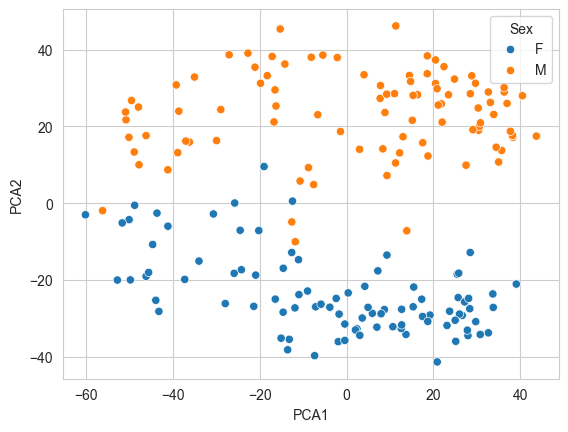

In [46]:
pca = PCA(n_components=2)
protein_mouse_pca = pd.DataFrame(pca.fit_transform(protein_mouse_scaled), columns=['PCA1', 'PCA2'])
sns.scatterplot(x=protein_mouse_pca.PCA1, y=protein_mouse_pca.PCA2, hue=protein_expr.Sex);

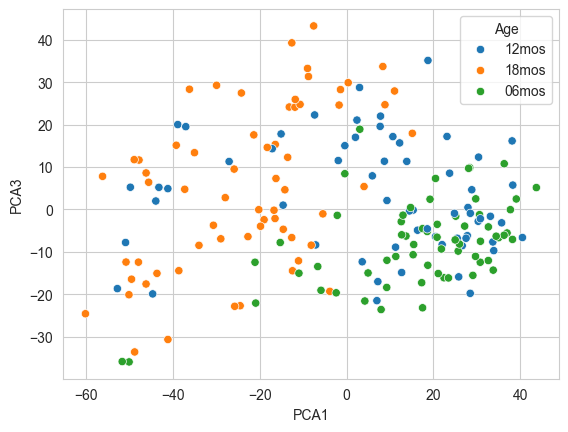

In [58]:
pca = PCA(n_components=4)
protein_mouse_pca = pd.DataFrame(pca.fit_transform(protein_mouse_scaled), columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'])
sns.scatterplot(x=protein_mouse_pca.PCA1, y=protein_mouse_pca.PCA3, hue=protein_expr.Age);

Na závěr si ukažme dva trochu zvláštnější případy použití:

## Číslice

Ručně psaných 1797 číslic od 43 lidí, zmenšených do rastru 8x8, intenzita jasu od 0 do 16. Stejně jako většina našich dat pochází z [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

Podívejme se na jednu konkrétní číslici, jak vypadá její číselná reprezentace a její obrázek.

(1797, 64)
[[ 0.  0.  0.  0. 12.  5.  0.  0.]
 [ 0.  0.  0.  2. 16. 12.  0.  0.]
 [ 0.  0.  1. 12. 16. 11.  0.  0.]
 [ 0.  2. 12. 16. 16. 10.  0.  0.]
 [ 0.  6. 11.  5. 15.  6.  0.  0.]
 [ 0.  0.  0.  1. 16.  9.  0.  0.]
 [ 0.  0.  0.  2. 16. 11.  0.  0.]
 [ 0.  0.  0.  3. 16.  8.  0.  0.]]


<Figure size 432x288 with 0 Axes>

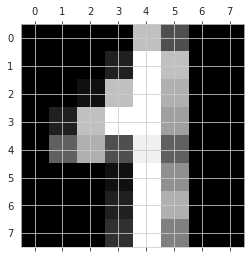

In [29]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
digits = load_digits()

#velikost dat
print(digits.data.shape)

# 42. číslice jako list
print(digits.images[42])

# 42. číslice jako obrázek
plt.gray() 
plt.matshow(digits.images[42].reshape(8,8));

Data si převedeme ta tabulku o 1797 řádcích a 64 sloupcích (a ověříme si, že 42. řádek je správně).

In [30]:
digits.images[42].reshape(1,64)

array([[ 0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
        12.,  0.,  0.,  0.,  0.,  1., 12., 16., 11.,  0.,  0.,  0.,  2.,
        12., 16., 16., 10.,  0.,  0.,  0.,  6., 11.,  5., 15.,  6.,  0.,
         0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.]])

In [31]:
digits_df = digits.images.reshape(1797,64)
print(digits_df.shape)
digits_df[42,:]

(1797, 64)


array([ 0.,  0.,  0.,  0., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
       12.,  0.,  0.,  0.,  0.,  1., 12., 16., 11.,  0.,  0.,  0.,  2.,
       12., 16., 16., 10.,  0.,  0.,  0.,  6., 11.,  5., 15.,  6.,  0.,
        0.,  0.,  0.,  0.,  1., 16.,  9.,  0.,  0.,  0.,  0.,  0.,  2.,
       16., 11.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.])

A nakreslíme si klasický PCA graf z prvních dvou komponent (povšimněte si, že nezávisí na tom, kolik `n_components` zvolíme).

In [32]:
# zkuste změnit počet komponent n_components a podívejte se, co se stane
n_components = 5
pca = PCA(n_components=n_components)
column_names = ["PCA" + str(i) for i in range(1,n_components+1)]

pca.fit(digits.images.reshape(1797,64))
digits_pca = pd.DataFrame(pca.transform(digits_df), columns=column_names)

digits_pca

PCA1       PCA2       PCA3       PCA4       PCA5
0     -1.259466  21.274883  -9.463055  13.014189  -7.128849
1      7.957611 -20.768699   4.439506 -14.893662   5.896363
2      6.991923  -9.955986   2.958558 -12.288302 -18.126072
3    -15.906105   3.332464   9.824372 -12.275839   6.965168
4     23.306867   4.269061  -5.675128 -13.851519  -0.357976
...         ...        ...        ...        ...        ...
1792 -14.606628  13.344124 -13.439048  -6.502947   3.787534
1793   6.464574  20.567299  -9.155110  12.554088  -9.015984
1794  10.801284  -6.960252   5.599555  -7.227730  -3.459572
1795  -4.872100  12.423954 -10.170866  -6.668847   3.569093
1796  -0.344390   6.365549  10.773708  -7.726214  -3.310662

[1797 rows x 5 columns]

/home/petr/.pyenv/versions/3.8.1/envs/pca/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



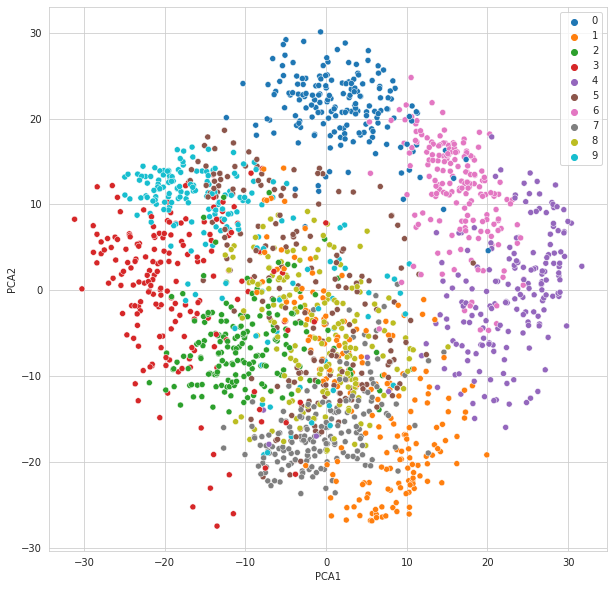

In [33]:
plt.figure(figsize=(10,10)) 
sns.scatterplot(x=digits_pca.PCA1, y=digits_pca.PCA2, 
                hue=digits.target_names[digits.target], legend='full',
                palette=sns.color_palette());

### Inverzní transformace

PCA můžeme chápat i jako formu komprese dat, pro převod z prostoru PCA zpět slouží metoda `inverse_transform`. Zkuste měnit počet komponent a dívejte se, jak se mění podoba rekonstruované číslice 1.

In [34]:
digits_from_pca = pca.inverse_transform(digits_pca)
digits_from_pca

array([[ 1.18974834e-15,  9.71423065e-02,  4.96370054e+00, ...,
         4.68963092e+00, -2.32562004e-01, -5.71321254e-01],
       [-8.91793934e-16,  2.42372419e-01,  2.85356300e+00, ...,
         7.78522071e+00,  3.50042876e+00,  1.06361335e+00],
       [-6.06035520e-16, -1.63415273e-01,  8.23932800e-01, ...,
         9.49245715e+00,  3.62264911e+00,  3.48060610e-01],
       ...,
       [-5.85855079e-17,  9.65723722e-02,  2.27239217e+00, ...,
         8.21481537e+00,  3.24594200e+00,  5.81401047e-01],
       [ 7.19943186e-16, -7.15894319e-03,  3.50952907e+00, ...,
         8.95909763e+00,  1.39503123e+00,  2.26457051e-01],
       [ 3.61296989e-16,  2.41846392e-01,  4.68685352e+00, ...,
         1.29149736e+01,  4.82448953e+00,  8.15606554e-01]])

In [35]:
pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()

(array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415]),
 0.5449635266933277)

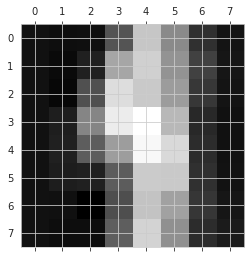

In [36]:
plt.matshow(digits_from_pca[42].reshape(8,8));

## Autoencoder

**Autoencoder** je neuronová síť, která se učí zkomprimovat vstupní data do menšího vnitřního *latentního* prostoru a pak z něj zrekonstruovat původní vstup. Od PCA se liší tím, že používá **nelineární transformace**, takže dokáže zachytit složitější struktury v datech – zatímco **PCA** je čistě **lineární projekce**, která hledá směry s největší variancí.

In [48]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data / 16.0
y = digits.target

# MLP autoencoder: 64 -> 32 -> 2 -> 32 -> 64
mlp = MLPRegressor(hidden_layer_sizes=(32, 2, 32),
                   activation="relu",
                   solver="adam",
                   max_iter=5000,
                   random_state=0)

mlp.fit(X, X)  # učíme se rekonstruovat vstup

MLPRegressor(hidden_layer_sizes=(32, 2, 32), max_iter=5000, random_state=0)

In [49]:
# Rekonstrukční MSE
X_hat = mlp.predict(X)
print("Autoencoder MSE:", mean_squared_error(X, X_hat))

# Vytáhneme 2D kód: manuální forward do bottlenecku
W0, W1, W2, W3 = mlp.coefs_
b0, b1, b2, b3 = mlp.intercepts_

Autoencoder MSE: 0.058762010092015184


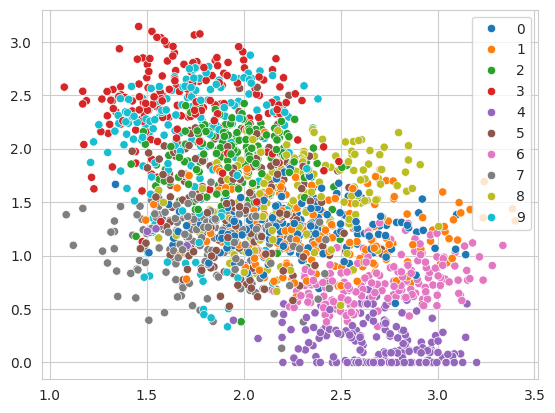

In [50]:
def relu(z): return np.maximum(0, z)
H1 = relu(X @ W0 + b0)     # 64 -> 32
Z2 = relu(H1 @ W1 + b1) # 2D bottleneck

sns.scatterplot(x=Z2[:,0], y=Z2[:,1], 
                hue=digits.target_names[digits.target], legend='full',
                palette=sns.color_palette());

### t-SNE

t-SNE (T-distributed Stochastic Neighbor Embedding) je jiná technika, jak obrazit mnohorozměrná data do dvou či tří dimenzí.

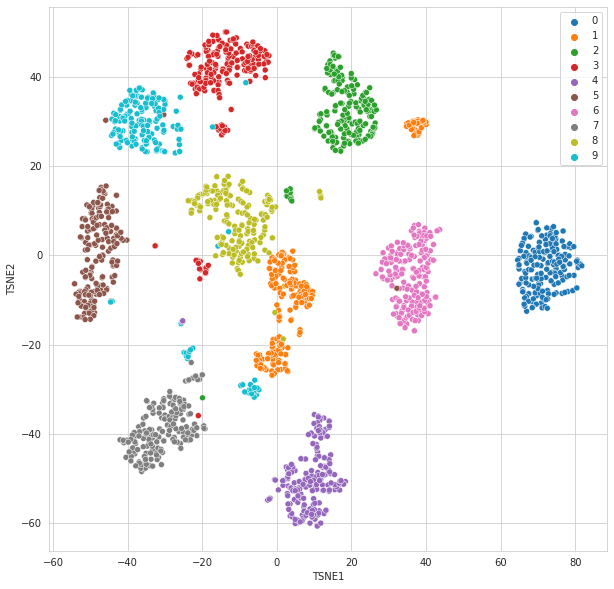

In [37]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
digits_tsne = pd.DataFrame(tsne.fit_transform(digits_df), columns=['TSNE1', 'TSNE2'])

plt.figure(figsize=(10,10)) 
sns.scatterplot(x=digits_tsne.TSNE1, y=digits_tsne.TSNE2, 
                hue=digits.target_names[digits.target], legend='full',
                palette=sns.color_palette());

## Embeddings

In [ ]:
# Stáhni model (jen jednou)
import wget

url = "https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.cs.300.vec.gz"
output = "cc.cs.300.vec.gz"

wget.download(url, out=output)
print("\nDownload finished:", output)

  2% [.                                               ]   37142528 / 1262989069

In [53]:
from gensim.models import KeyedVectors

# Stáhni model (jen jednou)
# wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.cs.300.vec.gz

# Načti model (chvíli to trvá, je to ~1.5 GB text)
model = KeyedVectors.load_word2vec_format("cc.cs.300.vec.gz", binary=False)

# Získej embedding pro jedno slovo
vec = model["kočka"]
print(vec.shape)      # (300,)
print(vec[:5])       # první hodnoty vektoru

(50,)
[-0.01631583  0.0089916  -0.00827415  0.00164907  0.01699724]


In [54]:
# Podobná slova podle kosinové podobnosti
print(model.most_similar("kočka", topn=5))

Most similar to 'cat': [('dog', 0.12486250698566437), ('on', 0.07399576157331467), ('the', 0.04237300902605057), ('mat', 0.018277151510119438), ('at', 0.011071980930864811), ('barked', -0.17424818873405457), ('sat', -0.1754782646894455)]


## Filmová hodnocení

Všimněte si, že celou dnešní lekci jsme pracovali s daty, které byly na PCA jako dělaná. Co ale dělat, když budou data např. obsahovat chybějící hodnoty?

Problém si demonstrujeme na hodnocení 50 filmů 100 diváky, která jsou vybraná z databáze [Movie Lens](https://grouplens.org/datasets/movielens/).

In [38]:
url_ratings = 'http://github.com/simecek/naucse.python.cz/blob/master/lessons/pydata/pca/static/ML_small.csv?raw=true'
ratings = pd.read_csv(url_ratings)

print(ratings.shape)
ratings.head()

(50, 101)


title  User1  User7  User13  User43  User44  User59  \
0       Air Force One (1997)    NaN    4.0     1.0     5.0     NaN     NaN   
1               Alien (1979)    5.0    4.0     4.0     NaN     4.0     5.0   
2              Aliens (1986)    5.0    3.0     3.0     NaN     5.0     5.0   
3  Back to the Future (1985)    5.0    5.0     5.0     4.0     4.0     5.0   
4       Birdcage, The (1996)    4.0    3.0     1.0     5.0     2.0     4.0   

   User62  User64  User92  ...  User864  User880  User881  User883  User889  \
0     NaN     3.0     NaN  ...      NaN      3.0      NaN      NaN      3.0   
1     4.0     5.0     4.0  ...      4.0      NaN      4.0      5.0      3.0   
2     5.0     4.0     5.0  ...      5.0      5.0      4.0      4.0      NaN   
3     3.0     NaN     4.0  ...      5.0      5.0      4.0      4.0      4.0   
4     NaN     NaN     3.0  ...      4.0      4.0      3.0      NaN      NaN   

   User892  User896  User913  User916  User919  
0      4.0      2.0      NaN      NaN      4.0  
1      5.0      4.0      4.0      4.0      3.0  
2      5.0      5.0      5.0      4.0      NaN  
3      4.0      4.0      4.0      3.0      4.0  
4      4.0      3.0      3.0      NaN      4.0  

[5 rows x 101 columns]

In [39]:
scaler = StandardScaler()
ratings_scaled = scaler.fit_transform(ratings.drop(columns='title'))

### Pravděpodobnostní PCA

Pravděpodobnostní (Probabilistic) PCA nám umožňuje doplnit chybějící pozorování. V Pythonu je implementovaná v knihovně PyPPCA.

In [40]:
# pip install PyPPCA  # odstraňte komentář pro instalaci balíčku
# bohužel nefunguje ve Windows
from pyppca import ppca

In [41]:
# značení podle ppca
C, ss, M, X, Ye = ppca(ratings_scaled, 2, False)

/home/petr/.pyenv/versions/3.8.1/envs/pca/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



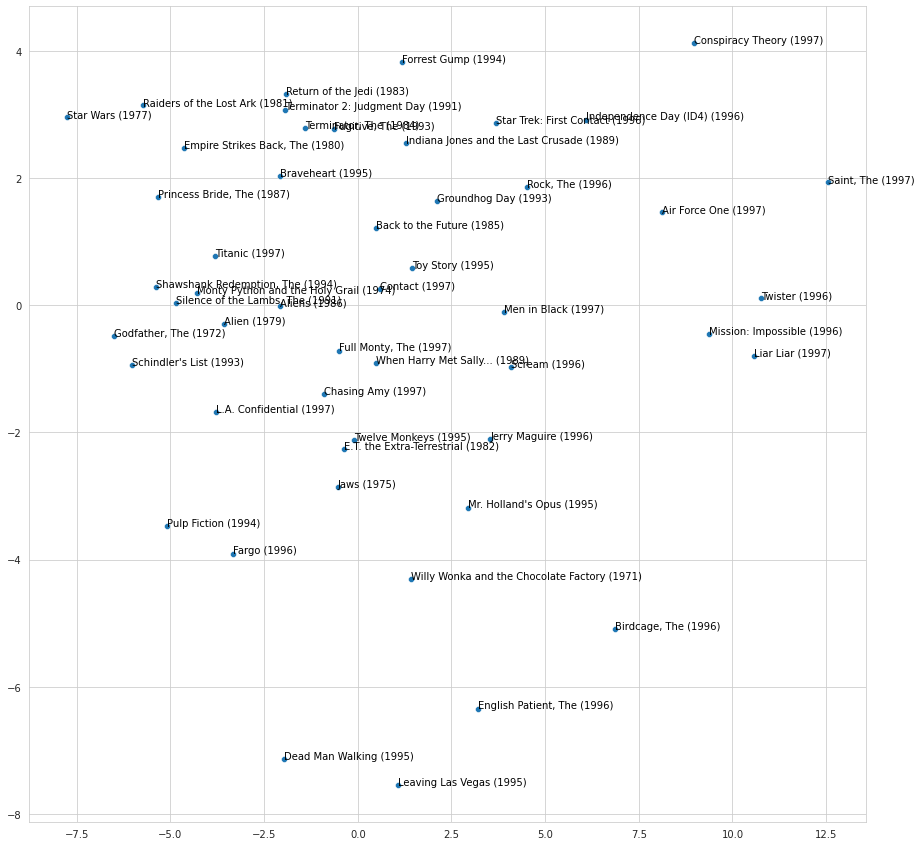

In [42]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(x=X[:,0], y=X[:,1])
for title, x, y in zip(ratings.title.values, X[:,0], X[:,1]):
    ax.text(x, y, title, size='medium', color='black')

### Doplnění (imputation) chybějících hodnot

Jinou možností je pokusit se chybějící hodnoty doplnit. Knihovna `sklearn` nám za tímto účelem nabízí funkce `SimpleImputer` a `IterativeImputer`.

In [43]:
# from sklearn.experimental import enable_iterative_imputer   # uncomment for iterative imputer
# from sklearn.impute import IterativeImputer
# imp = IterativeImputer(missing_values=np.nan, max_iter=20, random_state=0)

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

ratings_imp = imp.fit_transform(ratings_scaled)
pd.DataFrame(ratings_imp, columns=ratings.columns[1:], index=ratings.title).head()

User1     User7    User13        User43  \
title                                                                       
Air Force One (1997)      -4.002646e-16 -0.204124 -2.202152  1.250000e+00   
Alien (1979)               7.365022e-01 -0.204124  0.281875 -6.634260e-16   
Aliens (1986)              7.365022e-01 -1.224745 -0.546134 -6.634260e-16   
Back to the Future (1985)  7.365022e-01  0.816497  1.109884 -8.000000e-01   
Birdcage, The (1996)      -5.962160e-01 -1.224745 -2.202152  1.250000e+00   

                                 User44        User59        User62  \
title                                                                 
Air Force One (1997)       2.380791e-16 -4.829470e-16  1.570559e-16   
Alien (1979)               2.779924e-02  6.135420e-01  1.833397e-01   
Aliens (1986)              1.056371e+00  6.135420e-01  1.122956e+00   
Back to the Future (1985)  2.779924e-02  6.135420e-01 -7.562763e-01   
Birdcage, The (1996)      -2.029344e+00 -6.781254e-01  1.570559e-16   

                                 User64        User92        User94  ...  \
title                                                                ...   
Air Force One (1997)      -1.155686e+00 -2.094284e-16 -2.061843e-16  ...   
Alien (1979)               1.218155e+00  1.995019e-01  1.241532e+00  ...   
Aliens (1986)              3.123475e-02  1.296762e+00  5.643326e-02  ...   
Back to the Future (1985) -1.519253e-16  1.995019e-01  5.643326e-02  ...   
Birdcage, The (1996)      -1.519253e-16 -8.977584e-01 -1.128665e+00  ...   

                                User864       User880       User881   User883  \
title                                                                           
Air Force One (1997)      -6.459479e-16 -1.660308e+00  2.103580e-16  0.000000   
Alien (1979)              -1.322876e+00  5.160014e-16  2.215395e-01  1.241639   
Aliens (1986)              7.559289e-01  1.096430e+00  2.215395e-01  0.000000   
Back to the Future (1985)  7.559289e-01  1.096430e+00  2.215395e-01  0.000000   
Birdcage, The (1996)      -1.322876e+00 -2.819392e-01 -8.307732e-01  0.000000   

                                User889   User892   User896       User913  \
title                                                                       
Air Force One (1997)      -1.266626e+00 -0.899735 -1.651002  7.077672e-17   
Alien (1979)              -1.266626e+00  1.111438  0.127000  2.121910e-01   
Aliens (1986)              1.554312e-16  1.111438  1.016001  1.155262e+00   
Back to the Future (1985)  3.677300e-01 -0.899735  0.127000  2.121910e-01   
Birdcage, The (1996)       1.554312e-16 -0.899735 -0.762001 -7.308801e-01   

                                User916       User919  
title                                                  
Air Force One (1997)      -1.992708e-17  1.601282e-01  
Alien (1979)               2.769244e-01 -8.006408e-01  
Aliens (1986)              2.769244e-01 -1.649915e-16  
Back to the Future (1985) -8.030807e-01  1.601282e-01  
Birdcage, The (1996)      -1.992708e-17  1.601282e-01  

[5 rows x 100 columns]

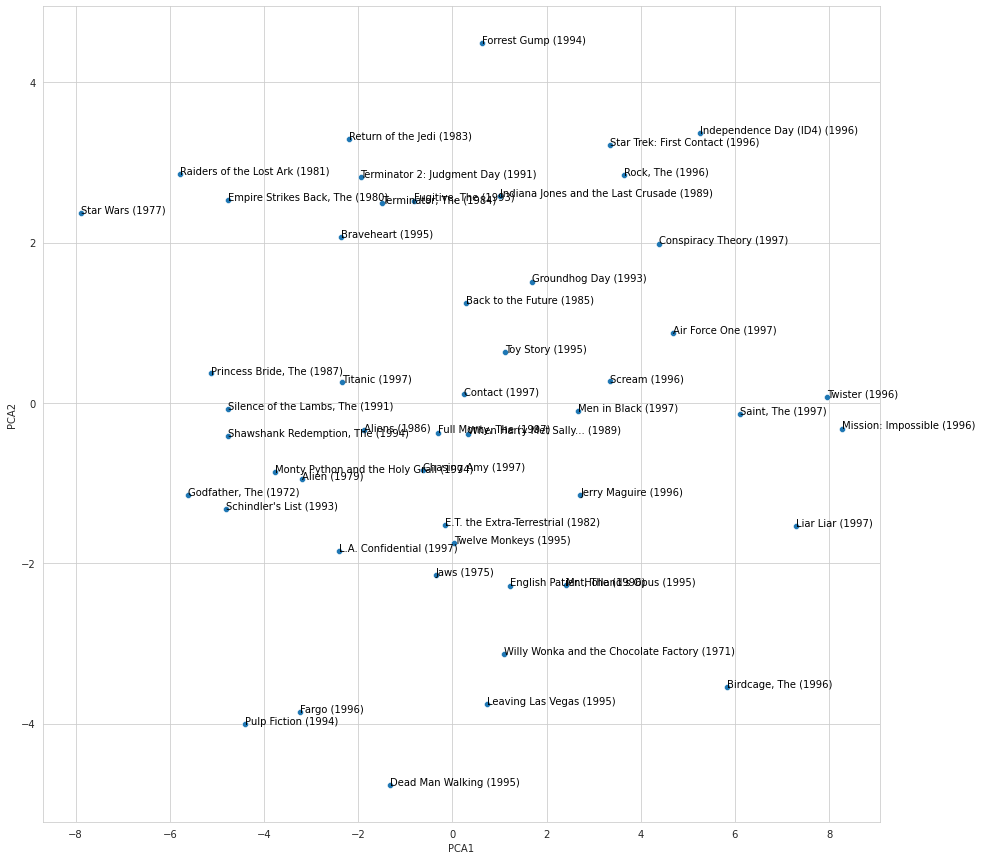

In [44]:
pca = PCA(n_components=2)
ratings_pca = pd.DataFrame(pca.fit_transform(ratings_imp), columns=['PCA1', 'PCA2'])

plt.figure(figsize=(15,15))
ax = sns.scatterplot(x=ratings_pca.PCA1, y=-ratings_pca.PCA2)
for title, x, y in zip(ratings.title.values, ratings_pca.PCA1, -ratings_pca.PCA2):
    ax.text(x, y, title, size='medium', color='black')

## Hierarchické shlukování (clustering) a heatmapy

PCA graf není jediná metoda, jak zachytit souvislosti mezi jednotlivými pozorováními mnohorozměrných dat. Asi nejčastější alternativou je heatmapa doplněná dendrogramy hierarchického shlukování tak, jak ji můžete vidět na obrázku níže.

Povšimněte si, že podobně jako u PCA vidíme tři jasné shluky vzorků vín.

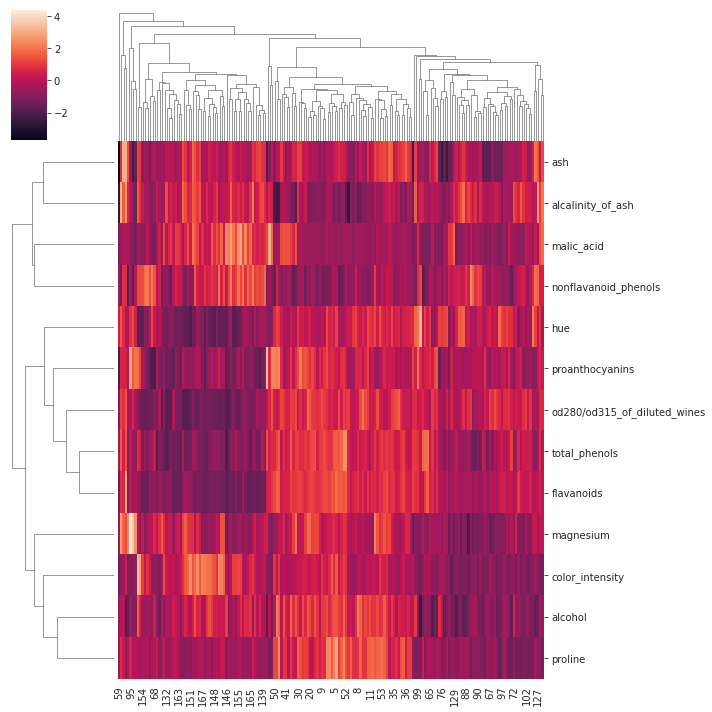

In [45]:
sns.clustermap(pd.DataFrame(wine_df_scaled, columns=wine_df.columns).T);

## Shrnutí a závěrečné poznámky

V tomto notebooku jsme se naučili aplikovat na mnohorozměrná data Analýzu hlavních komponent (Principal Component Analysis, PCA) za účelem grafické reprezentace nebo snížení velikosti dat (pro zrychlení výpočtu či ušetření paměti).

Témata PCA příbuzná, která se sem už nevešla:
* [Linear Discriminant Analysis](https://en.wikipedia.org/wiki/Linear_discriminant_analysis) technika příbuzná PCA, kde maximalizuje nikolik množství vysvětlené variability, ale množství informace vzhledem k jiné (závisle) proměnné
* [Correspondence Analysis](https://en.wikipedia.org/wiki/Correspondence_analysis) technika podobná PCA, ale aplikovaná na kategoriální, nikoli spojitá data
* [Faktorová analýza](https://en.wikipedia.org/wiki/Factor_analysis): metoda používaná především v psychologii a psychometrii, matematický model jiný, ale též pomáhá odhalovat faktory za mnohorozměrnými daty
* [Biplot](https://en.wikipedia.org/wiki/Biplot) PCA graf, kde krom pozorování jsou zanesené i vektory charakteristik (často používaný v R)
* Dvou nebo tří rozměrná PCA? U interaktivního grafu může být někdy dobrý nápad nakreslit 3-rozměrnou PCA. V opačném případě může 3-rozměrný graf "dobře vypadat", ale jinak pootočením ztrácíte informaci.
* Nespecifické filtrování charakteristik: pokud víte, že velká část vašich sloupců je konstantních, irelevantních apod. může být dobrý nápad je před PCA odfiltrovat (např. podle rozptylu)
* Pokud chcete vědět víc o PCA, přečtěte si [příslušnou kapitolu](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html) z Data Science Handbook
* Zmínili jsme hierarchické clusterování (shlukování), ale už nám nezbyl čas na [k-Means clustering](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html) 
* A pokud byste potřebovali vysvětlit PCA svojí babičce, podívejte se na [CrossValidated](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues/140579).